In [23]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t, ttest_1samp, ttest_ind

In [3]:
data = pd.read_csv('../data/diamonds_train.csv')

In [4]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


In [5]:
x_filter = data['x']==0
y_filter = data['y']==0
z_filter = data['z']==0

data.drop(data[(x_filter | y_filter | z_filter)].index, inplace=True)

In [6]:
data[data['y']==data['y'].max()]
data.drop(14708, inplace=True)

**Test 1 - One sample vs constant hypothesis test.** 

We know from the available literature that diamonds average price rounds about 4000 USD. The aim is to test whether the prices in our sample are significantly different from the literature value. Give some conclusions about the implications of your test results.

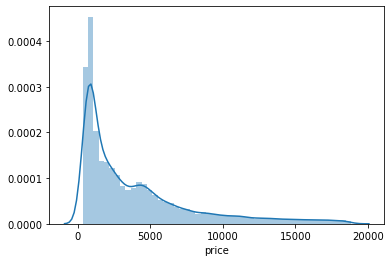

In [7]:
sns.distplot(data['price']);

In [8]:
# H0 la media del precio de nuestro dataset es igual a 4000

In [9]:
# handmade

mu_hat= data['price'].mean()
sigma_hat = data['price'].std()
print(f'data mean = {mu_hat},\ndata standard deviation = {sigma_hat}')

n = len(data['price'])
mu = 4000

t_handmade = (mu_hat - mu) / (sigma_hat / np.sqrt(n))
print(f'statistic t = {t_handmade}')

rv = t(df=n-1)
print(f'p_value = {rv.cdf(t_handmade)}')

rv.cdf(t_handmade)*2 < 0.05

data mean = 3926.3306048766012,
data standard deviation = 3989.8611910616073
statistic t = -3.7129931782431633
p_value = 0.00010254866928494984


True

In [10]:
# la media de nuestro dataset está por debajo de 4000 (el estadístico t es negativo)

In [11]:
# la media de nuestro dataset es diferente de 4000 y no es casualidad xq el p_value es menor de 0.05

In [12]:
# rechazamos H0, es decir la media de los precios es significativamente distinta de 4000

In [13]:
# scipy

test_results = ttest_1samp(data['price'], 4000)
display(f'statistic t = {test_results.statistic}', f'p_value = {test_results.pvalue}')
display(test_results.pvalue < 0.05)

'statistic t = -3.7129931782431633'

'p_value = 0.0002050973385698997'

True

**Test 2 - Two independent samples.**

Our sample includes diamonds with different features (carat, cut, color clarity, etc.). It seems clear that the carat plays an important role in price. However, it's not that clear whether the prices of some "sub-groups" are significantly different from each other. These are the "sub-groups" that you might feel suspicious about it:

In [81]:
def subsets_test(x,y):
    test = ttest_ind(x, y, equal_var=False)

    print(f'Statistic: {test.statistic}')
    print(f'P value: {test.pvalue}')
    
    if test.pvalue < 0.05:
        return f'Test on {TEST}: PASSED'
    else:
        return f'Test on {TEST}: FAILED'

**Sub-Test 1:** Fair cut + color G vs. Fair cut + color I

In [82]:
# H0 ---> mean price of both subsets are the same.

Set A size: 233
Set A mean: 4464.832618025751

Set B size: 141
Set B mean: 4459.014184397163

Statistic: 0.015041130667131423
P value: 0.9880088878309196


'Test on Fair cut + color G vs. Fair cut + color I: FAILED'

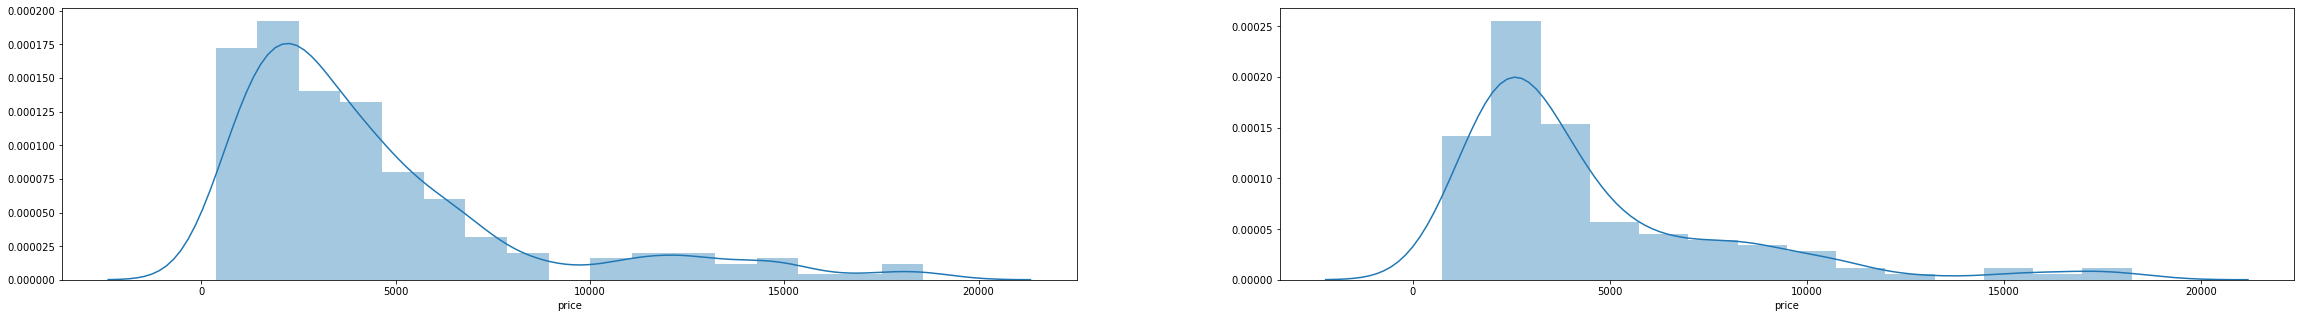

In [93]:
TEST = 'Fair cut + color G vs. Fair cut + color I'

color_filter = data['color']=='G'
cut_filter = data['cut']=='Fair'

set_A = data[color_filter & cut_filter]['price']

set_size = set_A.size
set_mean = set_A.mean()

print(f'Set A size: {set_size}\nSet A mean: {set_mean}')

print()

color_filter = data['color']=='I'
cut_filter = data['cut']=='Fair'

set_B = data[color_filter & cut_filter]['price']

set_size = set_B.size
set_mean = set_B.mean()

print(f'Set B size: {set_size}\nSet B mean: {set_mean}')

print()

fig, axes = plt.subplots(ncols=2, nrows =1, figsize = (40,5))
sns.distplot(set_A, ax=axes[0])
sns.distplot(set_B, ax=axes[1]);

subsets_test(set_A, set_B)

No pasaría el test xq el pvalue es mayor de 0.05, no si pasa el test es q no hay una media significativamente distinta entre las dos muestras. 

**Sub-Test 2:** Good cut + color E vs. Good cut + color F

Set A size: 690
Set A mean: 3399.88115942029

Set B size: 662
Set B mean: 3481.5755287009065

Statistic: -0.46310764059291415
P value: 0.6433618593904988


'Test on Good cut + color E vs. Good cut + color F: FAILED'

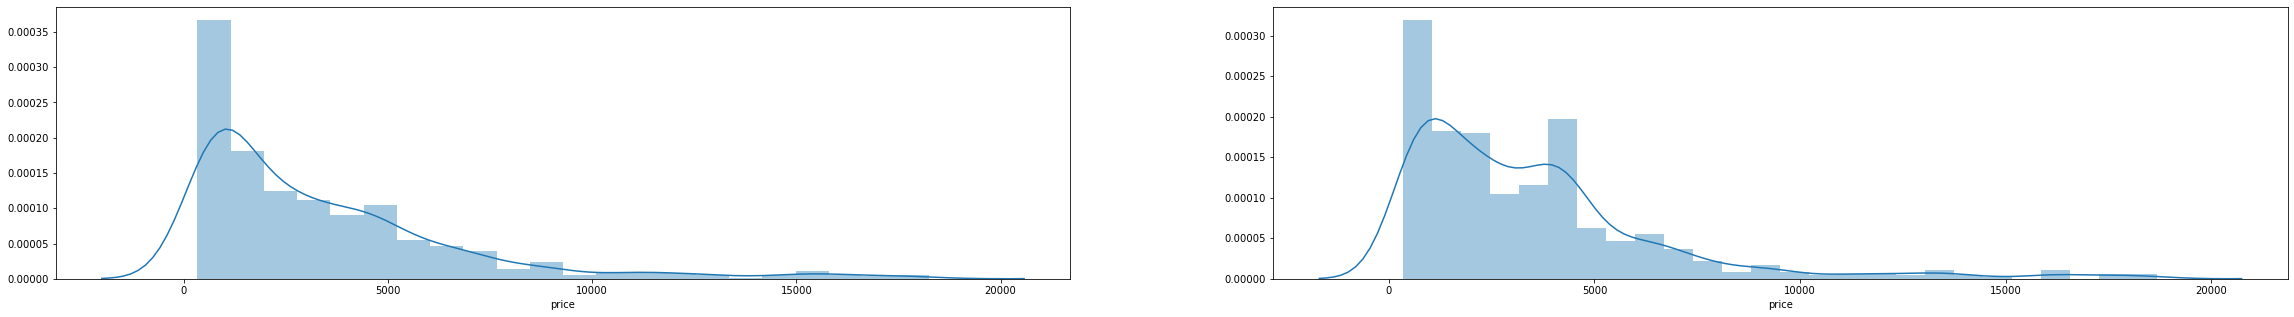

In [94]:
TEST = 'Good cut + color E vs. Good cut + color F'

color_filter = data['color']=='E'
cut_filter = data['cut']=='Good'

set_A = data[color_filter & cut_filter]['price']

set_size = set_A.size
set_mean = set_A.mean()

print(f'Set A size: {set_size}\nSet A mean: {set_mean}')

print()

color_filter = data['color']=='F'
cut_filter = data['cut']=='Good'

set_B = data[color_filter & cut_filter]['price']

set_size = set_B.size
set_mean = set_B.mean()

print(f'Set B size: {set_size}\nSet B mean: {set_mean}')

print()

fig, axes = plt.subplots(ncols=2, nrows =1, figsize = (40,5))
sns.distplot(set_A, ax=axes[0])
sns.distplot(set_B, ax=axes[1]);


subsets_test(set_A, set_B)

**Sub-Test 3:** Ideal cut + color D vs. Ideal cut + color E

Set A size: 2156
Set A mean: 2579.709647495362

Set B size: 2917
Set B mean: 2624.818649297223

Statistic: -0.5376051381964381
P value: 0.590875060001048


'Test on Ideal cut + color D vs. Ideal cut + color F: FAILED'

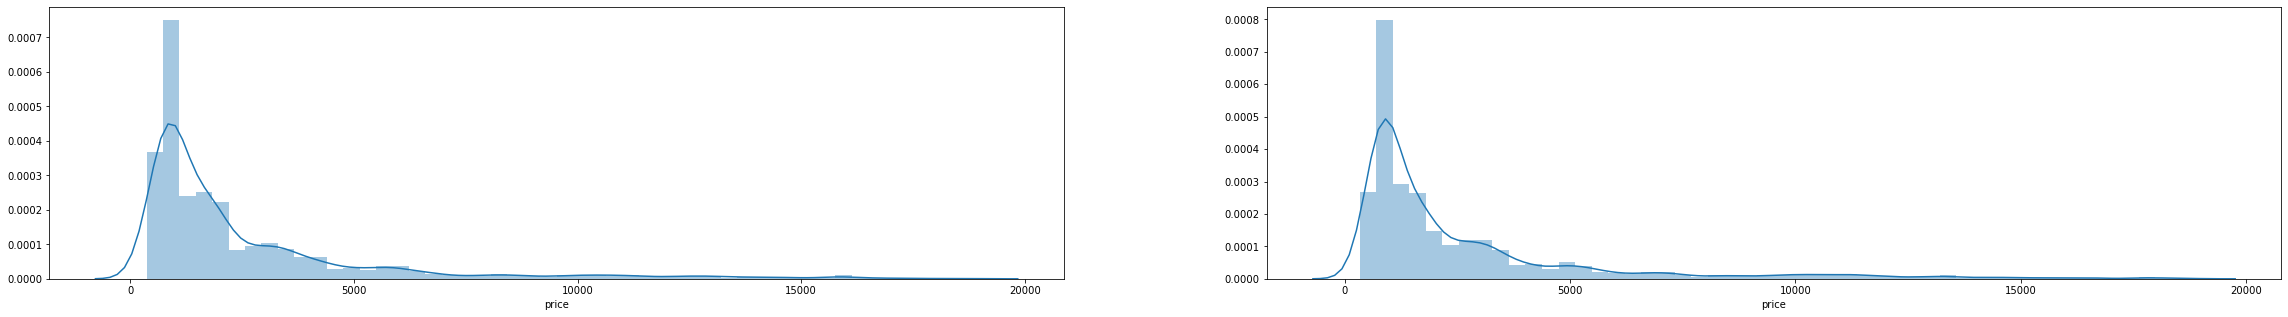

In [95]:
TEST = 'Ideal cut + color D vs. Ideal cut + color F'

color_filter = data['color']=='D'
cut_filter = data['cut']=='Ideal'

set_A = data[color_filter & cut_filter]['price']

set_size = set_A.size
set_mean = set_A.mean()

print(f'Set A size: {set_size}\nSet A mean: {set_mean}')

print()

color_filter = data['color']=='E'
cut_filter = data['cut']=='Ideal'

set_B = data[color_filter & cut_filter]['price']

set_size = set_B.size
set_mean = set_B.mean()

print(f'Set B size: {set_size}\nSet B mean: {set_mean}')

print()

fig, axes = plt.subplots(ncols=2, nrows =1, figsize = (40,5))
sns.distplot(set_A, ax=axes[0])
sns.distplot(set_B, ax=axes[1]);


subsets_test(set_A, set_B)

**Sub-Test 4:** Premium cut + color D vs. Premium cut + color E

**Sub-Test 5:** Very Good cut + color I vs. Very Good cut + color J

**Sub-Test 6:** All cuts + color D vs. All cuts + color E